## 1) Delivery_time -> Predict delivery time using sorting time 

In [174]:
#importing libraries and reading the dataset 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf 

In [92]:
delivery= pd.read_csv('Delivery_time.csv')
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [100]:
delivery=delivery.rename(columns={'Delivery Time': 'del_time','Sorting Time':'sort_time'})

In [101]:
#seperating the data into x and y 
# from Question X is sorting time and Y is Delivery time 
x=delivery.iloc[:,1].values
y=delivery.iloc[:,0].values

In [102]:
x

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5], dtype=int64)

In [103]:
y

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [104]:
# finding the correlation between the x & y variables 
corr = delivery.corr()
corr

,del_time,sort_time
del_time,1.000000,0.825997
sort_time,0.825997,1.000000


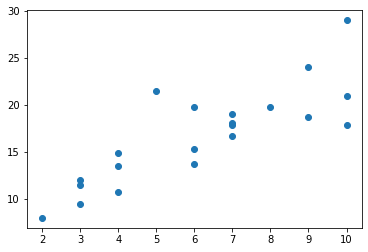

In [105]:
#we can also check the correlation by scatterplot 
plt.scatter(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='del_time', ylabel='Density'>

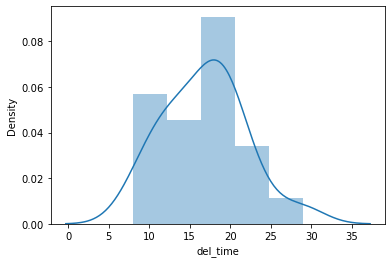

In [132]:
# we can use sns regplot for getting the distribution plot 
sns.distplot(delivery['del_time'])
    

In [107]:
#fitting a linear regression model 
model= smf.ols("del_time~sort_time", data =delivery).fit()

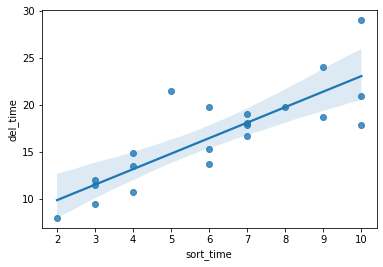

In [108]:
# getting the regression line from seaborn with regpplot 
sns.regplot(x="sort_time",y="del_time", data = delivery );

In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               del_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        16:39:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sort_time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# For coefiicients 
model.params

Intercept    6.582734
sort_time    1.649020
dtype: float64

In [111]:
#for prdicting the value a we use the formula 
# (a*sort_time)+Intercept 
# let a = 10 
predicted = (10*1.64920)+6.582734

In [119]:
# predicting for new data points 
New_sort = pd.Series([7,4])

In [121]:
del_predict=pd.DataFrame(New_sort,columns=['sort_time'])

In [122]:
#predicted values for delivery time at sorting Time = 7 & 4 
model.predict(del_predict)

0    18.125873
1    13.178814
dtype: float64

In [ ]:
#so we get the predicted delivery time for sort time 7 & 4 
#simillarly we can find predictions for whole delivery time 

## 2) Salary_hike -> Build a prediction model for Salary_hike

In [159]:
salary=pd.read_csv(r'Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [160]:
salary = salary.rename(columns={'YearsExperience':'Exp'})

In [161]:
salary['Salary']=salary['Salary']/10000
salary

,Exp,Salary
0,1.1,3.9343
1,1.3,4.6205
2,1.5,3.7731
3,2.0,4.3525
4,2.2,3.9891
5,2.9,5.6642
6,3.0,6.0150
7,3.2,5.4445
8,3.2,6.4445
9,3.7,5.7189


In [162]:
salary.corr()

,Exp,Salary
Exp,1.000000,0.978242
Salary,0.978242,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

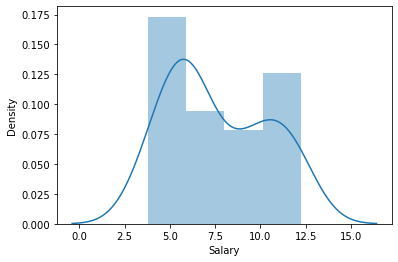

In [163]:
sns.distplot(salary['Salary'])

In [164]:
model2= smf.ols("Salary~Exp",data=salary).fit()

<AxesSubplot:xlabel='Exp', ylabel='Salary'>

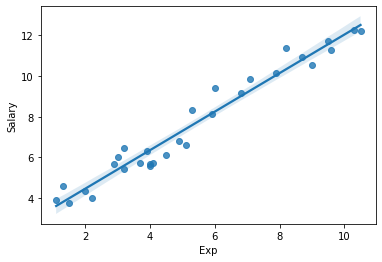

In [165]:
sns.regplot(x='Exp',y='Salary', data = salary)

In [166]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        17:53:53   Log-Likelihood:                -25.131
No. Observations:                  30   AIC:                             54.26
Df Residuals:                      28   BIC:                             57.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5792      0.227     11.347      0.000       2.114       3.045
Exp            0.9450      0.038     24.950      0.000       0.867       1.023
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
model.params

Intercept    6.582734
sort_time    1.649020
dtype: float64

In [168]:
# Now we got the intercept and the slope now to get predictions 
New_sal = pd.Series([1.5,3])

In [169]:
sal_predict=pd.DataFrame(New_sal,columns=['Exp'])

In [172]:
pred_salary = model2.predict(sal_predict) * 10000
pred_salary

0    39967.143681
1    54142.087163
dtype: float64

In [173]:
# so we get the predicted salaries for the experience 1.5 and 3 yrs 
# similarly we can predict the salary based n Experience 